# Lab 6

In [2]:
import networkx as nx
from networkx.algorithms import node_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
G = nx.path_graph(4)
gpos = nx.spectral_layout(G)

G.edges()

EdgeView([(0, 1), (1, 2), (2, 3)])

In [4]:
G.nodes

NodeView((0, 1, 2, 3))

In [5]:
G.node[0]['label'] = 'blue'
G.node[3]['label'] = 'red'

node_color = [G.node[n]['label'] if 'label' in G.node[n] else 'black' for n in G.nodes]
node_color

['blue', 'black', 'black', 'red']

/home/sentenced210/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


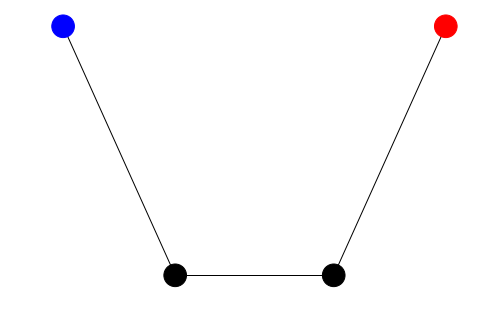

In [6]:
nx.draw(G, gpos, with_labels=False, node_size=512, node_color=node_color)

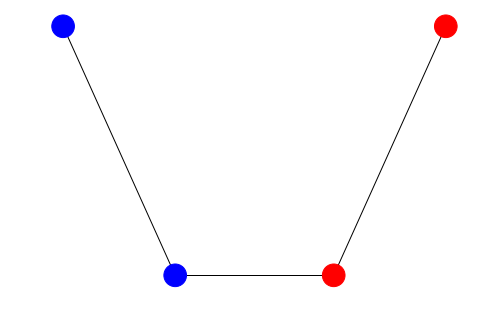

In [7]:
nx.draw(G,gpos, with_labels=False, node_size=512, node_color=node_classification.harmonic_function(G))

In [8]:
G = nx.karate_club_graph()

In [9]:
colored_clubs = ['red' if G.nodes[n]['club'] == 'Officer' else 'blue' for n in G.nodes]

In [10]:
gpos = nx.spring_layout(G, iterations=200)

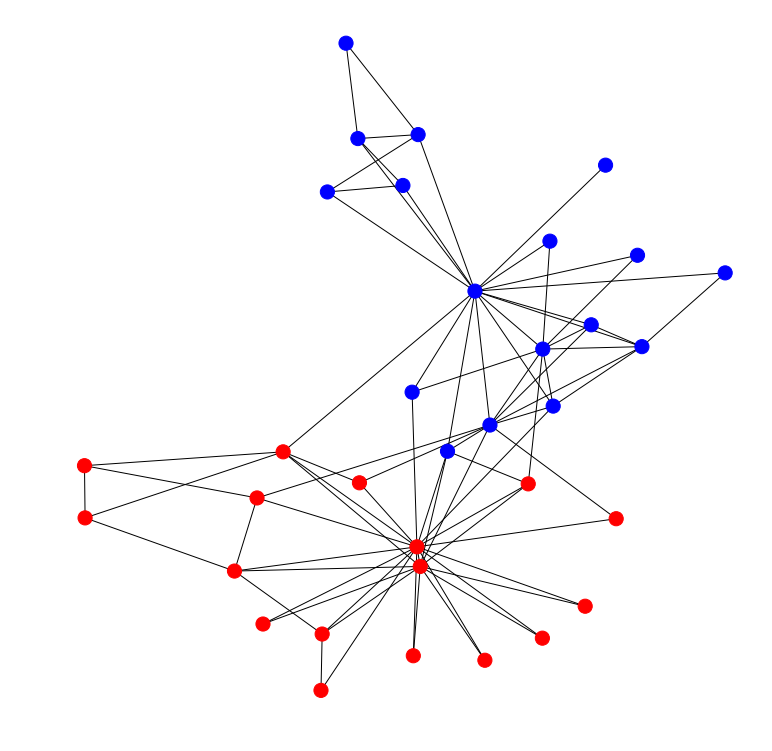

In [11]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=colored_clubs)
plt.show()

In [12]:
label_removed = set([0, 1, 2, 3, 4, 5, 6, 7])
for i in label_removed:
    del G.node[i]['club']

In [13]:
G.node[8]['club']

'Mr. Hi'

In [14]:
colored_clubs = [
    'red' if 'club' in G.node[n] and G.node[n]['club'] == 'Officer' 
    else 'blue' if 'club' in G.node[n] and G.node[n]['club'] == 'Mr. Hi' 
    else 'gray' for n in G.nodes
]

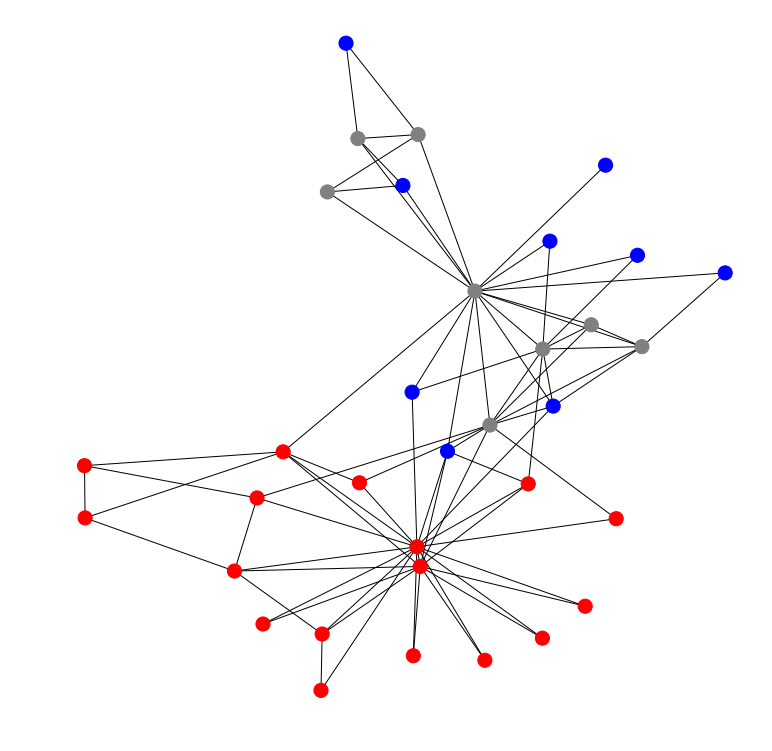

In [15]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=colored_clubs)
plt.show()

In [16]:
from nose.tools import *

predicted = node_classification.harmonic_function(G, label_name='club')
label_not_removed = set(list(range(len(G)))) - label_removed
for i in label_not_removed:
    print(predicted[i], G.node[i]['club'])
    assert_equal(predicted[i], G.node[i]['club'])

Mr. Hi Mr. Hi
Officer Officer
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Officer Officer
Officer Officer
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Officer Officer
Mr. Hi Mr. Hi
Officer Officer
Mr. Hi Mr. Hi
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer


# Graded Part


In [17]:
def create_toroidal(k):
    G=nx.Graph()
    count = 0
    mapping1 = {}
    mapping2 = {}
    for i in range(k):
        for j in range(k):
            mapping1[count] = (i,j)
            mapping2[(i,j)] = count
            G.add_node(count)
            count +=1
    for i in range(k):
        for j in range(k):
            if (i,j+1) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i,j+1])
            if (i,j-1) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i,j-1])
            if (i+1,j) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i+1,j])
            if (i-1,j) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i-1,j])  
    j = 0
    for i in range(k):
        G.add_edge(mapping2[(i,j)],mapping2[i,j+k-1])
    i = 0
    for j in range(k):
        G.add_edge(mapping2[(i,j)],mapping2[i+k-1,j])
    return G

In [18]:
G = create_toroidal(16)  
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [19]:
G.node[0]['label'] = 'blue'
G.node[255]['label'] = 'red'
gpos = nx.spring_layout(G, iterations=200)
node_color=['blue' if n == 0 else 'red' if n == 255 else 'gray' for n in G.nodes]

/home/sentenced210/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


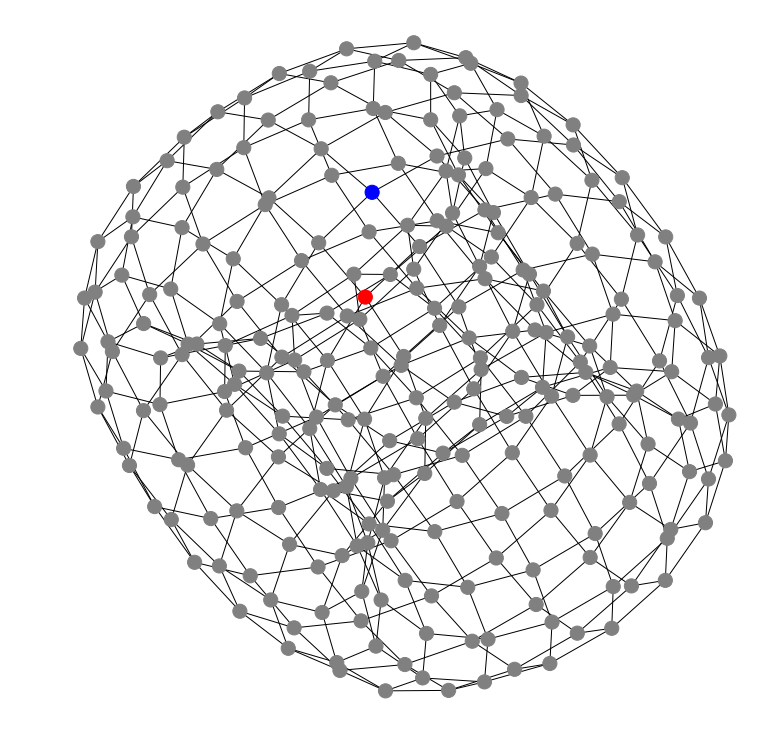

In [20]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=node_color)
plt.show()

In [21]:
node_color=node_classification.harmonic_function(G)

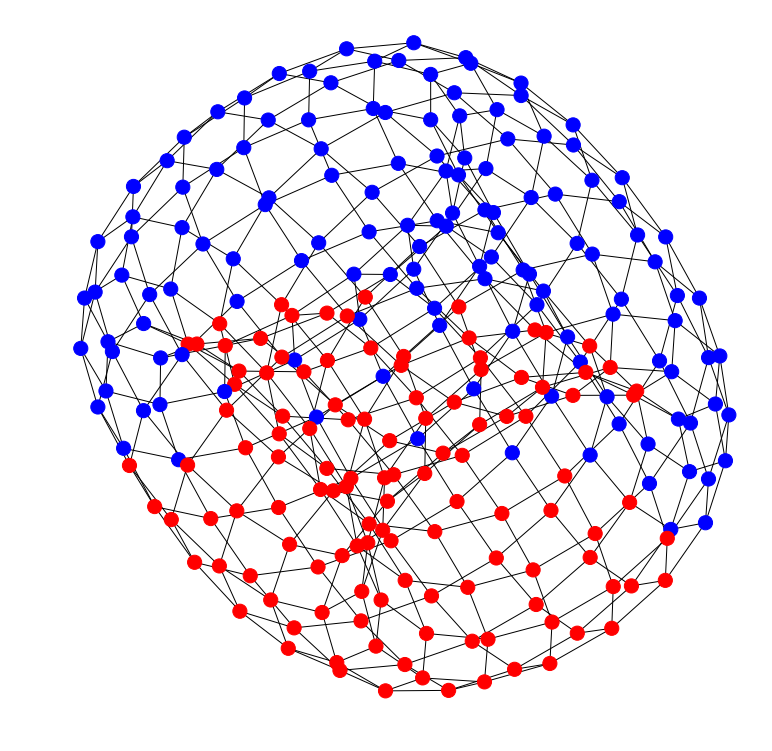

In [22]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=node_color)
plt.show()

In [23]:
print(node_color)

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 're

In [24]:
removed = [n for n in G.nodes if n%3 == 0 ]
for n in G.nodes:
    if n not in removed:
        G.node[n]['label'] = node_color[n]

In [25]:
print(G.node[1])
print(G.node[2])
print(G.node[3])
print(G.node[4])
print(G.node[252])
print(G.node[253])
print(G.node[254])
print(G.node[255])

{'label': 'blue'}
{'label': 'blue'}
{}
{'label': 'blue'}
{}
{'label': 'red'}
{'label': 'red'}
{'label': 'red'}


In [26]:
predicted = node_classification.harmonic_function(G, label_name='label')

In [27]:
print(predicted)

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'r

In [28]:
for i in range(len(node_color)):
    print(predicted[i], node_color[i])
    assert_equal(predicted[i], node_color[i])

blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
red red
red red
red red
red red
red red
red red
red red
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue red


AssertionError: 'blue' != 'red'
- blue
+ red


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [30]:
confusion_matrix(node_color, predicted)

array([[136,   0],
       [  2, 118]])

In [31]:
precision_recall_fscore_support(node_color, predicted)

(array([0.98550725, 1.        ]),
 array([1.        , 0.98333333]),
 array([0.99270073, 0.99159664]),
 array([136, 120]))

# Harmonic function implementation

In [38]:
def your_harmonic_function(Graph, label_name):
    sigma = 0.2
    n = len(Graph.node)  # Number of nodes in graph

    # Computing set of labeled and unlabeled nodes in graph
    labeled_nodes = set([node for node in Graph.node if label_name in Graph.node[node]])
    unlabeled_nodes = set(Graph.node) - labeled_nodes

    l = len(labeled_nodes)
    u = len(unlabeled_nodes)

    # Computing labels set
    labels = set([Graph.node[node][label_name] for node in labeled_nodes])

    # Initialize real values for labels between 0 and 1
    step = 1.0 / (len(labels) - 1)
    init_float = 0.0

    label_to_float = dict()
    for label in sorted(labels):
        label_to_float[label] = init_float
        init_float += step

    # Computing vector f_l
    f_l = np.array([label_to_float[Graph.node[node][label_name]] for node in sorted(labeled_nodes)]).reshape((-1, 1))

    # Creating and initializing matrix W
    W = np.zeros((n, n))

    for i in range(n):
        shortest_lengths = nx.algorithms.shortest_path_length(Graph, i, weight=1)
        for j in range(n):
            W[i][j] = np.exp(-(float(shortest_lengths[j]) ** 2) / (sigma ** 2))

    # Creating and initializing matrix D
    D = np.zeros((n, n))

    for i in range(n):
        D[i][i] = np.sum(W[i])

    # Computing matrix P
    P = np.linalg.inv(D) @ W

    # Computing submatrix uu for matrix P
    P_uu = np.zeros((u, u))

    for i_P_uu, i_P in enumerate(sorted(unlabeled_nodes)):
        for j_P_uu, j_P in enumerate(sorted(unlabeled_nodes)):
            P_uu[i_P_uu][j_P_uu] = P[i_P][j_P]

    # Computing submatrix ul for matrix P
    P_ul = np.zeros((u, l))

    for i_P_ul, i_P in enumerate(sorted(unlabeled_nodes)):
        for j_P_ul, j_P in enumerate(sorted(labeled_nodes)):
            P_ul[i_P_ul][j_P_ul] = P[i_P][j_P]

    # Computing vector f_u
    I = np.identity(u)
    f_u = np.linalg.inv(I - P_uu) @ P_ul @ f_l

    # Initialise to nodes labels
    labeled_dict = dict()

    for i, node in enumerate(sorted(labeled_nodes)):
        labeled_dict[node] = f_l[i][0]

    for i, node in enumerate(sorted(unlabeled_nodes)):
        labeled_dict[node] = f_u[i][0]

    for node in labeled_dict:
        min_key = ""
        min_value = 99999.9
        for key, value in label_to_float.items():
            if abs(value - labeled_dict[node]) < min_value:
                min_key = key
                min_value = abs(value - labeled_dict[node])
        labeled_dict[node] = min_key

    return [labeled_dict[node] for node in sorted(labeled_dict)]

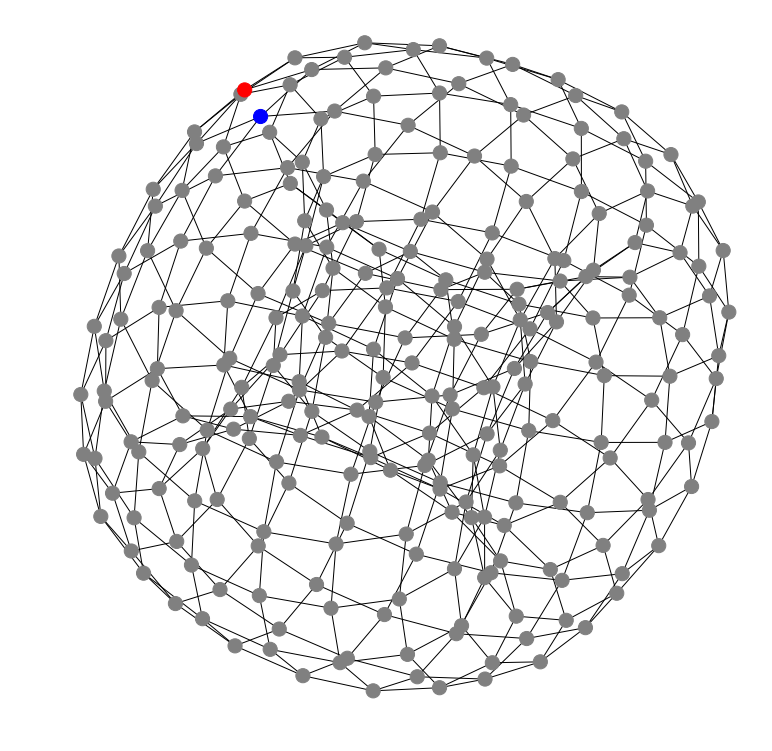

In [39]:
G = create_toroidal(16)  
G.node[0]['label'] = 'blue'
G.node[255]['label'] = 'red'
gpos = nx.spring_layout(G, iterations=200)
node_color=['blue' if n == 0 else 'red' if n == 255 else 'gray' for n in G.nodes]
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=node_color)
plt.show()

In [40]:
node_color=node_classification.harmonic_function(G)
removed = [n for n in G.nodes if n%3 == 0 ]
for n in G.nodes:
    if n not in removed:
        G.node[n]['label'] = node_color[n]
predicted = your_harmonic_function(G, label_name='label')

confusion_matrix(node_color, predicted)
precision_recall_fscore_support(node_color, predicted)

(array([0.98550725, 1.        ]),
 array([1.        , 0.98333333]),
 array([0.99270073, 0.99159664]),
 array([136, 120]))